# Assignment 3 - Titanic Practice
## ADSP 31008 Data Mining Principles

### Christina Song
### 02-12-2024

In [1]:
# import all necessary packages

%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

<center> 
    
### Data Dictionary
    
| Variable | Definition Key  |
-----------|-----------------|
| survival | 0 = No, 1 = Yes |
| pclass   | Ticket Class; 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex      | Sex             |
| Age | Age in years |
| sibsp | # of siblings/spouses aboard |
| parch | # of parents/child aboard |
| ticket | ticket number |
| fare | Passenger fare |
| cabin | Cabin number |
| embarked | Port of Embarkation; C = Cherbourg, Q = Queenstown, S =Southampton |
       
<center>

### Step 1: Pre-Processing Data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

12 features, 891 rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing some values for Age, Cabin, and Embarked. The Cabin column is missing more than 3/4 of the dataset. It won't make sense to impute the data. We could drop the feature "Cabin".

In [5]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

May create a new feature "is_alone" to emphasize the dominancy of the '0' column for the Parch feature.

In [6]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since 'S' is the most dominant value for the 'Embarked' feature, we can fill the two missing values with 'S'.

In [7]:
# filling missing values for 'Embarked'

df['Embarked'] = df['Embarked'].fillna('S')

/var/folders/k7/96j2v32x5hzd0cnmry5y_j100000gn/T/ipykernel_20658/1310957098.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Age'].notnull()]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

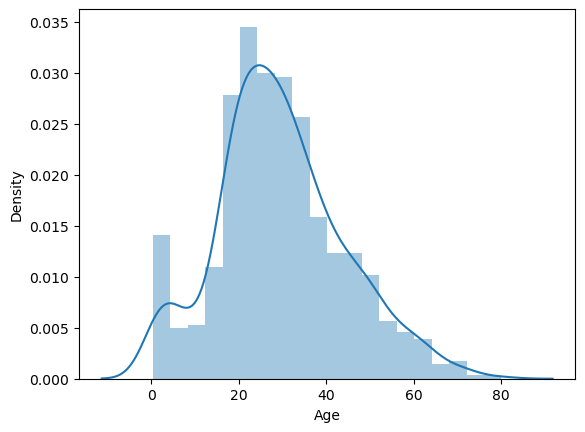

In [8]:
# Exploring the feature Age to decide how to impute missing values

sns.distplot(df[df['Age'].notnull()]['Age'])

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
df['Age'] = df['Age'].interpolate()

In [11]:
df['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/var/folders/k7/96j2v32x5hzd0cnmry5y_j100000gn/T/ipykernel_20658/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

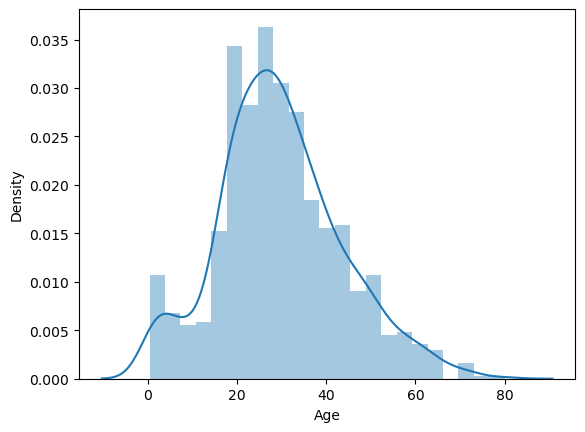

In [12]:
sns.distplot(df['Age'])

In [13]:
# drop Cabin from dataset

df = df.drop('Cabin', axis = 1)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# drop any features that don't have predictive meaning

df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Pclass', ylabel='count'>

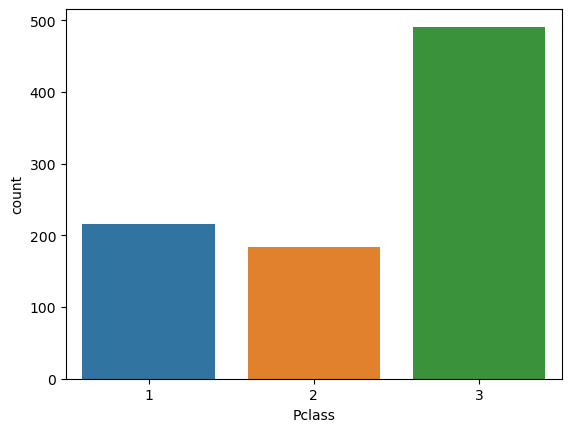

In [17]:
sns.countplot(x='Pclass', data = df)

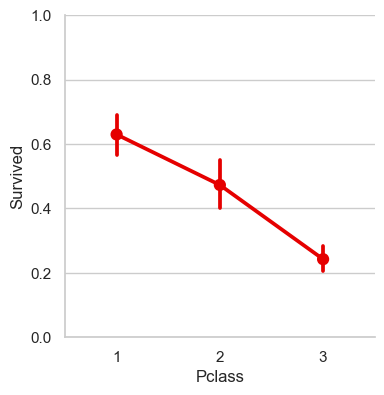

In [18]:
sns.set(style = 'whitegrid')
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', height=4)
g.map(sns.pointplot, color=sns.xkcd_rgb['red'])
g.set(ylim=(0, 1))

**Interesting note:** the probability of passengers surviving goes down per class. 

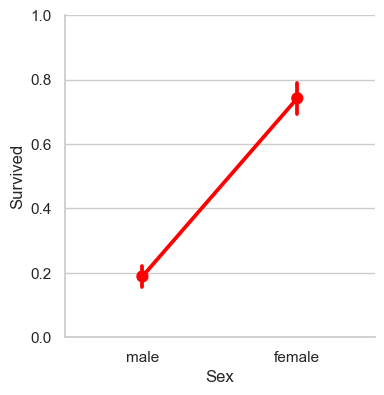

In [19]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', height=4)
h.map(sns.pointplot, color='red')
h.set(ylim=(0,1))

**Interesting note:** The probability of female passengers is higher than that of male passengers.

In [20]:
# creating a new feature column 'is_child' for those under age of 15. 

df['is_child'] = df['Age'].apply(lambda x: 1 if x <= 15 else 0)

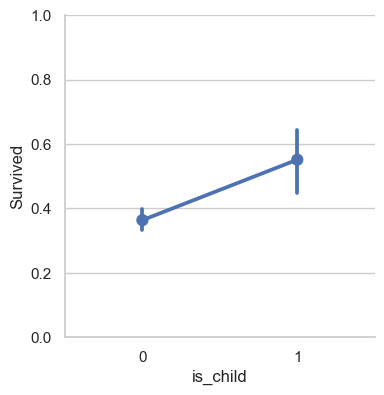

In [21]:
i = sns.PairGrid(data=df, x_vars=['is_child'], y_vars='Survived', height = 4)
i.map(sns.pointplot)
i.set(ylim=(0,1))

In [22]:
# combine sibling/spouse and parent/child as family

df['family'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)

In [23]:
# create new feature column 'is_alone' to identify those who boarded Titanic on their own

df['is_alone'] = df['family'].apply(lambda x: 1 if x == 0 else 0)

In [24]:
# create new feature column 'is_female'

df['is_female'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df = df.drop('Sex', axis = 1)
df.head()

,Survived,Pclass,Age,Fare,Embarked,is_child,family,is_alone,is_female
0,0,3,22.0,7.2500,S,0,1,0,0
1,1,1,38.0,71.2833,C,0,1,0,1
2,1,3,26.0,7.9250,S,0,0,1,1
3,1,1,35.0,53.1000,S,0,1,0,1
4,0,3,35.0,8.0500,S,0,0,1,0


In [25]:
# create dummy variables for binary features
# get_dummies will look for columns with categorical data
# will leave any other is_ columns as is but will change 'Embarked' into is_C, is_Q, is_S

df = pd.get_dummies(df, prefix = ['is'])

In [26]:
df.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,0,0,1


### Step 2: Building Model

In [27]:
# assigning X features and y target

X, y = df.drop(['Survived'], axis=1), df['Survived']

In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [29]:
# Importing Classifier Modules

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from joblib import dump # to save the model

In [30]:
# stratify=y ensures that the split of the data will preserve the same proportions of the target variable y in both the train and test datasets. 
# Stratification aims to ensure that both the training and testing sets are representative of the overall distribution of the target variable

train_X, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y)

In [31]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Logistic Regression

In [32]:
# logistic regression

logreg = LogisticRegression()

# train model
logreg.fit(train_X, train_y)

# predict model
y_pred_log_reg = logreg.predict(test_x)
acc_log_reg = round(logreg.score(test_x, test_y) * 100, 2)
print(str(acc_log_reg) + ' percent')

80.45 percent


/Users/csong97/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, y_pred_log_reg)

print(conf_matrix)

# [[true negative, false positive]
# [ false negative, true positive]]

[[99 11]
 [24 45]]


- **True negatives (TN):** The number of negative instances (for the target variable) correctly classified.
- **False positives (FP):** The number of negative instances incorrectly classified as positive.
- **False negatives (FN):** The number of positive instances incorrectly classified as negative.
- **True positives (TP):** The number of positive instances correctly classified.

#### Support Vector Machine

In [34]:
svm = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm.fit(train_X, train_y)
y_pred_svm = svm.predict(test_x)

acc_svc = round(svm.score(test_x, test_y) * 100, 2)
print(acc_svc)

80.45


#### Linear SVC

In [35]:
svc = SVC(kernel='linear', probability=True)
svc.fit(train_X, train_y)
y_pred_svc = svc.predict(test_x)
acc_linear_svc = round(svc.score(test_x, test_y) * 100, 2)
print(acc_linear_svc)

80.45


#### KNN

In [36]:
# let's scale the dataset since KNN is more sensitive to the distance of each data point

scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(train_X)
scaled_test_x = scaler.transform(test_x)

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(scaled_train_X, train_y)
y_pred_knn = knn.predict(scaled_test_x)
acc_knn = round(knn.score(scaled_test_x, test_y) *100, 2)
print(acc_knn)

82.68


#### Decision Tree

In [38]:
dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)
y_pred_dt = dt.predict(test_x)
acc_decision_tree = round(dt.score(test_x, test_y) * 100, 2)
print(acc_decision_tree)

84.92


#### Random Forest

In [39]:
# random forest

rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_X, train_y)
y_pred_rf = rf.predict(test_x)
acc_random_forest = round(rf.score(test_x, test_y) * 100, 2)
print(acc_random_forest)

82.12


#### Naive Bayes

In [40]:
gnb = GaussianNB()
gnb.fit(train_X, train_y)
y_pred_gnb = gnb.predict(test_x)

acc_gnb = round(gnb.score(test_x, test_y) * 100, 2)
print(acc_gnb)

77.09


#### Perceptron

In [41]:
perceptron = Perceptron(max_iter=1000, tol=0.001)
perceptron.fit(train_X, train_y)
y_pred_perceptron = perceptron.predict(test_x)

acc_perceptron = round(perceptron.score(test_x, test_y) * 100, 2)
print(acc_perceptron)

72.07


#### Stochastic Gradient Descent

In [42]:
# stochastic gradient descent 

sgd = SGDClassifier(max_iter=1000, tol=0.001)
sgd.fit(train_X, train_y)
y_pred_sgd = sgd.predict(test_x)

acc_sgd = round(sgd.score(test_x, test_y) * 100, 2)
print(acc_sgd)

73.74


#### Function for all classifiers

Instead of defining these one by one, we could also create this function to apply to all classifiers. 

In [43]:
def pfs_first_classifier(model):
    classifier = model()
    classifier.fit(train_X, train_y)
    print(round(classifier.score(test_x, test_y) * 100, 2))
    return classifier

In [44]:
# put all models in a list

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC',
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes',
              'Perceptron', 'Stochastic Gradient Descent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc,
              acc_knn, acc_decision_tree, acc_random_forest, acc_gnb,
              acc_perceptron, acc_sgd]
})

models.sort_values(by='Score', ascending=False)
    

,Model,Score
4,Decision Tree,84.92
3,KNN,82.68
5,Random Forest,82.12
0,Logistic Regression,80.45
1,Support Vector Machines,80.45
2,Linear SVC,80.45
6,Naive Bayes,77.09
8,Stochastic Gradient Descent,73.74
7,Perceptron,72.07


Models that return the top 3 highest accuracy scores are provided by Decision Tree, KNN, and Random Forest Models. 

### Step 3: Testing models

In [45]:
holdout_data = pd.read_csv('holdout_test.csv')

In [46]:
holdout_data.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
holdout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     0 non-null      float64
 1   PassengerId  418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


**Apply the same cleaning methods to the holdout_test dataset**

/var/folders/k7/96j2v32x5hzd0cnmry5y_j100000gn/T/ipykernel_20658/388381187.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(holdout_data[holdout_data['Age'].notnull()]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

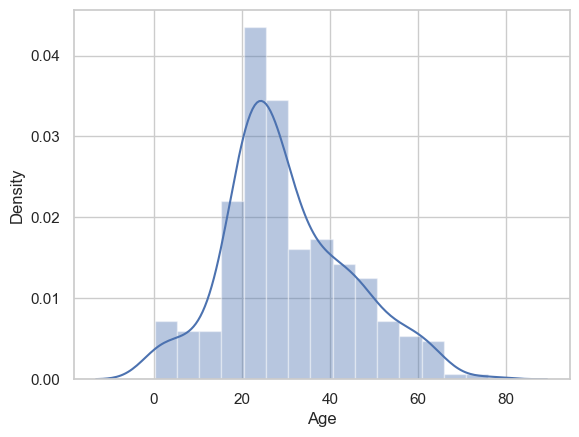

In [48]:
# Exploring the feature Age to decide how to impute missing values

sns.distplot(holdout_data[holdout_data['Age'].notnull()]['Age'])

In [49]:
holdout_data['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [50]:
holdout_data['Age'] = holdout_data['Age'].interpolate()

In [51]:
holdout_data['Age'].describe()

count    418.000000
mean      30.045251
std       13.502708
min        0.170000
25%       21.500000
50%       27.700000
75%       38.875000
max       76.000000
Name: Age, dtype: float64

In [52]:
# drop Cabin from dataset

holdout_data = holdout_data.drop('Cabin', axis = 1)

In [53]:
holdout_data.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [54]:
holdout_data.isnull().sum()

Survived       418
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

There is one null value for the 'Fare' column. We can interpolate like we did for age.

In [55]:
holdout_data['Fare'] = holdout_data['Fare'].interpolate()
holdout_data.isnull().sum()

Survived       418
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [56]:
# drop any features that don't have predictive meaning

holdout_data = holdout_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
holdout_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,NaN,3,male,34.5,0,0,7.8292,Q
1,NaN,3,female,47.0,1,0,7.0000,S
2,NaN,2,male,62.0,0,0,9.6875,Q
3,NaN,3,male,27.0,0,0,8.6625,S
4,NaN,3,female,22.0,1,1,12.2875,S


In [57]:
# creating a new feature column 'is_child' for those under age of 15. 

holdout_data['is_child'] = holdout_data['Age'].apply(lambda x: 1 if x <= 15 else 0)

In [58]:
# combine sibling/spouse and parent/child as family

holdout_data['family'] = holdout_data['SibSp'] + holdout_data['Parch']
holdout_data = holdout_data.drop(['SibSp', 'Parch'], axis=1)

In [59]:
# create new feature column 'is_alone' to identify those who boarded Titanic on their own

holdout_data['is_alone'] = holdout_data['family'].apply(lambda x: 1 if x == 0 else 0)

In [60]:
# create new feature column 'is_female'

holdout_data['is_female'] = holdout_data['Sex'].apply(lambda x: 1 if x == 'female' else 0)
holdout_data = holdout_data.drop('Sex', axis = 1)
holdout_data.head()

,Survived,Pclass,Age,Fare,Embarked,is_child,family,is_alone,is_female
0,NaN,3,34.5,7.8292,Q,0,0,1,0
1,NaN,3,47.0,7.0000,S,0,1,0,1
2,NaN,2,62.0,9.6875,Q,0,0,1,0
3,NaN,3,27.0,8.6625,S,0,0,1,0
4,NaN,3,22.0,12.2875,S,0,2,0,1


In [61]:
# create dummy variables for binary features
# get_dummies will look for columns with categorical data
# will leave any other is_ columns as is but will change 'Embarked' into is_C, is_Q, is_S

holdout_data = pd.get_dummies(holdout_data, prefix = ['is'])

In [62]:
holdout_data.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,NaN,3,34.5,7.8292,0,0,1,0,0,1,0
1,NaN,3,47.0,7.0000,0,1,0,1,0,0,1
2,NaN,2,62.0,9.6875,0,0,1,0,0,1,0
3,NaN,3,27.0,8.6625,0,0,1,0,0,0,1
4,NaN,3,22.0,12.2875,0,2,0,1,0,0,1


In [63]:
X_holdout = holdout_data.drop(['Survived'], axis=1)

In [66]:
dt_y_pred_holdout = dt.predict(X_holdout)

holdout_data['Survived'] = dt_y_pred_holdout

In [67]:
holdout_data.to_csv('Titanic Results from Christina Song.csv', index=False)

In [68]:
titanic_results = pd.read_csv('Titanic Results from Christina Song.csv')
titanic_results.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,34.5,7.8292,0,0,1,0,0,1,0
1,0,3,47.0,7.0000,0,1,0,1,0,0,1
2,1,2,62.0,9.6875,0,0,1,0,0,1,0
3,0,3,27.0,8.6625,0,0,1,0,0,0,1
4,1,3,22.0,12.2875,0,2,0,1,0,0,1


#### Conclusion:
As mentioned above, the models that return the top 3 highest accuracy scores are provided by Decision Tree, KNN, and Random Forest Models. 

